In [1]:
import numpy as np

In [5]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from src.TwoLayerNet import TwoLayerNet

In [6]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [12]:
iters_num = train_size = 10000
batch_size = 100
learning_rate = 0.1

In [13]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

#1エポックあたりの繰り返し数
iter_per_epoch = max(iters_num / batch_size, 1)

In [26]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
for i in range(iters_num):
    # get mini batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # calcurate gradient
    grab = network.gradient(x_batch, t_batch)
    
    # update parameter
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grab[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("-----loop:" + str(i)+"----")
#         print("grab:"+key+" = "+str(np.sum(grab[key])))
        for key in ('W1', 'b1', 'W2', 'b2'):
            print("params:"+key+" = "+str(np.sum(network.params[key])))
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
        
    if i > 1000:
        break

-----loop:0----
params:W1 = 2.0328931646000497
params:b1 = 0.00018423983502848025
params:W2 = 2.5447487661503256
params:b2 = 0.09900000000000002
train acc, test acc | 0.09915, 0.1009
-----loop:100----
params:W1 = 712.0401710353348
params:b1 = 8.166145268085812
params:W2 = 428.44361613166666
params:b2 = 9.998999999999997
train acc, test acc | 0.10441666666666667, 0.1028
-----loop:200----
params:W1 = 984.0415141566482
params:b1 = 12.225880238868786
params:W2 = 920.1014670428601
params:b2 = 19.899000000000004
train acc, test acc | 0.11236666666666667, 0.1135
-----loop:300----
params:W1 = 1140.8308295359136
params:b1 = 14.712941298007902
params:W2 = 1414.0066527504996
params:b2 = 29.799000000000007
train acc, test acc | 0.11236666666666667, 0.1135
-----loop:400----
params:W1 = 1255.312061762777
params:b1 = 16.56236692831976
params:W2 = 1908.4422133000348
params:b2 = 39.699
train acc, test acc | 0.11236666666666667, 0.1135
-----loop:500----
params:W1 = 1346.3544346438728
params:b1 = 18.1089

-----loop:0----
grab:b2 = -0.99
train acc, test acc | 0.11236666666666667, 0.1135
-----loop:100----
grab:b2 = -0.9899999999999999
train acc, test acc | 0.11236666666666667, 0.1135
-----loop:200----
grab:b2 = -0.99
train acc, test acc | 0.11236666666666667, 0.1135
-----loop:300----
grab:b2 = -0.9900000000000001
train acc, test acc | 0.10441666666666667, 0.1028
-----loop:400----
grab:b2 = -0.9900000000000001
train acc, test acc | 0.11236666666666667, 0.1135
-----loop:500----
grab:b2 = -0.99
train acc, test acc | 0.11236666666666667, 0.1135
-----loop:600----
grab:b2 = -0.99
train acc, test acc | 0.11236666666666667, 0.1135
-----loop:700----
grab:b2 = -0.9899999999999998
train acc, test acc | 0.11236666666666667, 0.1135
-----loop:800----
grab:b2 = -0.9900000000000001
train acc, test acc | 0.11236666666666667, 0.1135
-----loop:900----
grab:b2 = -0.9899999999999999
train acc, test acc | 0.11236666666666667, 0.1135
-----loop:1000----
grab:b2 = -0.9900000000000001
train acc, test acc | 0.11236

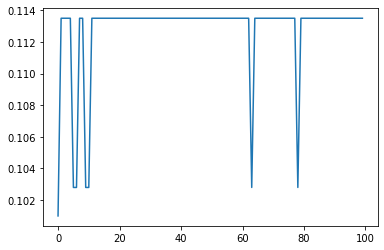

In [21]:
import  matplotlib.pylab as plt
x = np.arange(0, 100, 1)
plt.plot(x, test_acc_list)